# Dataset_of_Contemporary_Islamic_Figures

Import libariries

In [1]:
%matplotlib inline
import numpy as np
import pywt
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
img = cv2.imread('./test_img/1.jpg')
img.shape

(224, 224, 3)

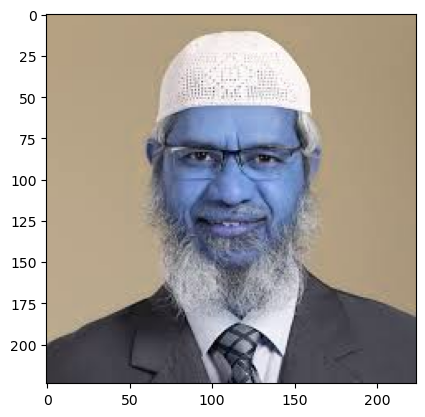

In [45]:
plt.imshow(img)
plt.show()

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(224, 224)

In [47]:
gray

array([[154, 154, 154, ..., 142, 142, 142],
       [154, 154, 154, ..., 142, 142, 142],
       [154, 154, 154, ..., 142, 142, 142],
       ...,
       [ 57,  57,  58, ...,  75,  74,  74],
       [ 57,  57,  58, ...,  75,  74,  74],
       [ 57,  57,  58, ...,  75,  74,  74]], dtype=uint8)

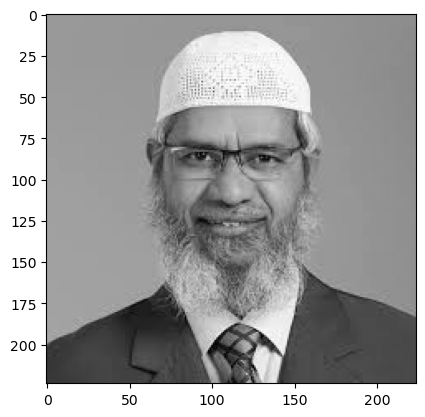

In [48]:
plt.imshow(gray, cmap='gray')
plt.show()

In [49]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 56,  49, 104, 104]], dtype=int32)

In [50]:
(x, y, w, h) = faces[0]
x, y, w, h

(np.int32(56), np.int32(49), np.int32(104), np.int32(104))

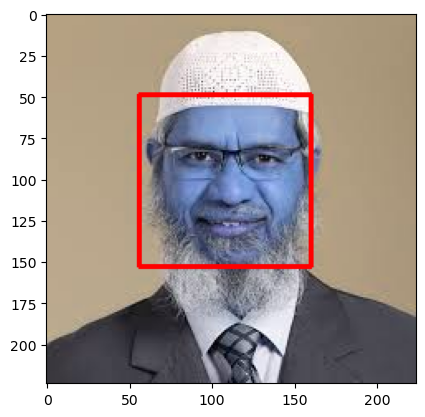

In [51]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

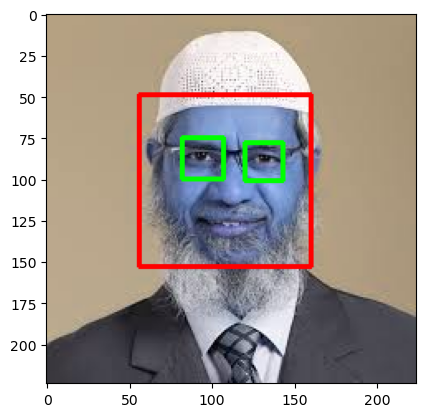

In [52]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew, eh) in eyes[:2]:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

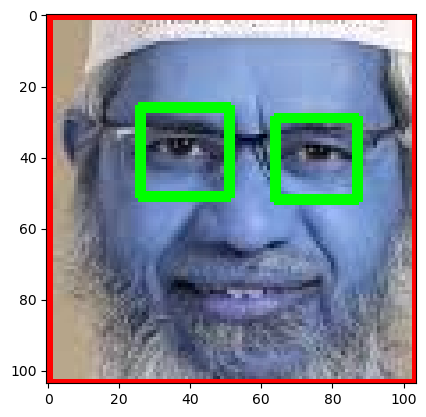

In [53]:
plt.imshow(roi_color, cmap='gray')
plt.show()

In [54]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread (image_path)
    if img is None:
        print("⚠️ None :", image_path)
        return None
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len (eyes) >= 2:
            return roi_color

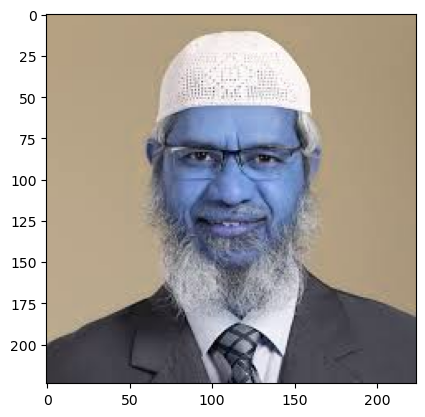

In [57]:
original_img = cv2.imread('./test_img/1.jpg')
plt.imshow(original_img)
plt.show()

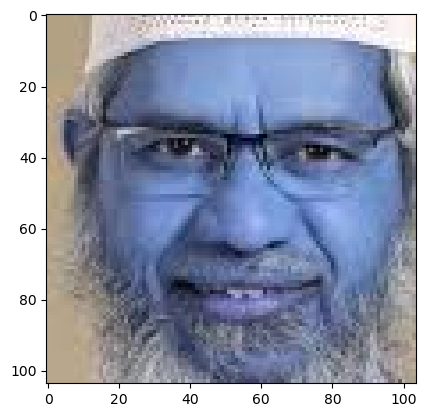

In [58]:
cropped_img = get_cropped_image_if_2_eyes('./test_img/1.jpg')
plt.imshow(cropped_img)
plt.show()

# Data Clening Pros  . . . . .

In [59]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [60]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [61]:
img_dirs

['./images_dataset/abdulqadeer_khan',
 './images_dataset/ahmed_deedat',
 './images_dataset/hassan_alturabi',
 './images_dataset/metwally_alshaarawy',
 './images_dataset/zakir_naik']

In [62]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# Export imgs

In [63]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder :", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            if celebrity_name not in celebrity_file_names_dict:
                celebrity_file_names_dict[celebrity_name] = []
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count +=1

abdulqadeer_khan
Generating cropped images in folder : ./images_dataset/cropped/abdulqadeer_khan
ahmed_deedat
Generating cropped images in folder : ./images_dataset/cropped/ahmed_deedat
hassan_alturabi
metwally_alshaarawy
Generating cropped images in folder : ./images_dataset/cropped/metwally_alshaarawy
⚠️ None : ./images_dataset/metwally_alshaarawy\في ذكرى وفاة إمام الدعاة.. محطات في حياة الشيخ محمد متولي الشعراوي.. تميزه  في اللغة العربية يفتح له خزائن تفسير كتاب الله.. وسر خطابه لملك السعودية  ومواقفه لرد الشبهات عن القرآن.jpg
zakir_naik
Generating cropped images in folder : ./images_dataset/cropped/zakir_naik


## Here I'm Delet some Photoes Manule

In [64]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

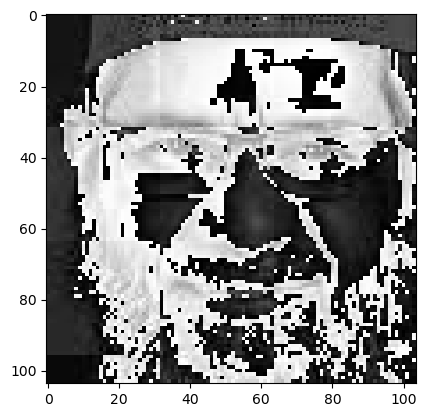

In [65]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [66]:
celebrity_file_names_dict

{'abdulqadeer_khan': ['./images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan1.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan2.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan3.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan4.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan5.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan6.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan7.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan8.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan9.png',
  './images_dataset/cropped/abdulqadeer_khan/abdulqadeer_khan10.png'],
 'ahmed_deedat': ['./images_dataset/cropped/ahmed_deedat/ahmed_deedat1.png',
  './images_dataset/cropped/ahmed_deedat/ahmed_deedat2.png',
  './images_dataset/cropped/ahmed_deedat/ahmed_deedat3.png',
  './images_dataset/cropped/ahmed_deedat/ahmed_deedat4.png',
  './images_dataset/cropped/

In [67]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'abdulqadeer_khan': 0,
 'ahmed_deedat': 1,
 'metwally_alshaarawy': 2,
 'zakir_naik': 3}

In [68]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            print("❌ None:", training_img)
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_raw_har = cv2.resize(img_har, (32, 32))
        combinesd_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_raw_har.reshape(32*32, 1)))
        X.append(combinesd_img)
        y.append(class_dict[celebrity_name])

In [69]:
print(len(X))
print(len(X[0]))

31
4096


# Not Bad Number ( 163 )

In [70]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(31, 4096)

In [71]:
X[0]

array([ 91., 101., 106., ..., 240.,  39., 150.])

# Data Clening Dooooooonne !!!

...

# Model Training Pros   . . . . . 

In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#create pipline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [74]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      1.00      0.86         3
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.60      0.67      0.63         8
weighted avg       0.66      0.75      0.70         8



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [77]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in 

,model,best_score,best_params
0,svm,0.74,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.66,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.73,{'logisticregression__C': 1}


In [78]:
best_estimators['svm'].score(X_test, y_test)

0.75

In [79]:
best_estimators['random_forest'].score(X_test, y_test)

0.625

In [80]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.625

In [81]:
best_clf = best_estimators['svm']

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 1, 0]])

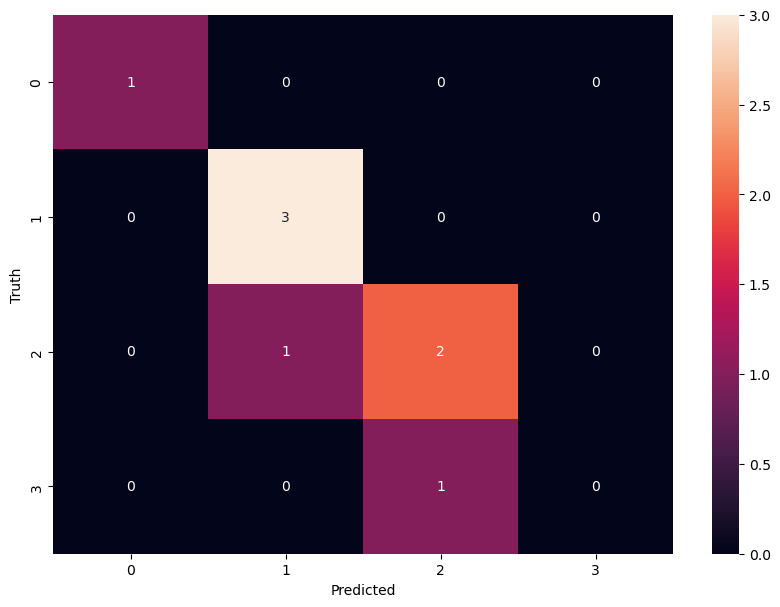

In [83]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [84]:
class_dict

{'abdulqadeer_khan': 0,
 'ahmed_deedat': 1,
 'metwally_alshaarawy': 2,
 'zakir_naik': 3}

## Save Model

In [85]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Access is denied.


['saved_model.pkl']

## Save Dict

In [86]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))